In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import model
import helpers

In [12]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [255]:
import pipeline as pp

In [254]:
# Read data
file = 'data/projects_2012_2013.csv'
coltypes = {'school_ncesid': str}
parse_dates = ['date_posted', 'datefullyfunded']
df = pd.read_csv(file, dtype=coltypes, parse_dates=parse_dates)

In [256]:
# Calculate the number of days it takes for a project to get fully funded
df['time_till_funded'] = (df.datefullyfunded - df.date_posted).apply(lambda x: x.days)

# Create target variable to identify projects fully funded within 60 days of their posting dates
df['not_funded_wi_60d'] = np.where(df.time_till_funded > 60, 1, 0)

In [257]:
# Set target variable to constant
label = 'not_funded_wi_60d'

# Discretize total_price_including_optional_support

bins_tp = [0, 300, 600, 900, 1200, float('inf')]
labels_tp = ['<300', '300-600', '600-900', '900-1200', '>1200']
df['total_price_cat'] = pd.cut(df['total_price_including_optional_support'], bins=bins_tp, labels=labels_tp)

# Convert selected variables to dummies

cols_to_transform = ['school_charter', 'school_magnet', 'primary_focus_area', 
                     'resource_type', 'secondary_focus_area', 'resource_type', 
                     'poverty_level', 'grade_level', 'eligible_double_your_impact_match', 
                     'total_price_cat']
dfbin = pd.get_dummies(df, dummy_na=True, columns=cols_to_transform)

In [258]:
# select a vector of features 
feat_cols = pp.get_feature_cols(label, dfbin)

In [259]:
from sklearn.model_selection import train_test_split

In [260]:
X_train, X_test, y_train, y_test = train_test_split(dfbin[feat_cols], df[T], test_size=0.3)

### 1 model building starts here

In [296]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [297]:
params = {'max_depth': 10, 'min_samples_split': 10}

In [298]:
m = model.Model(clf, X_train, y_train, X_test, y_test, params, N=1, iteration=1,
                model_type="DT", features=feat_cols, output_dir="output", label=T, 
                ks=None, thresholds=None)

In [299]:
m.fit_and_predict(debug=True)

set params
generated prediction scores
stored feature importances


In [300]:
m.set_ks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [303]:
m.populate_evalutaions()

In [308]:
pd.read_csv('output/evalutaions.csv', header=None)

,0,1,2,3,4,5,6,7,8,9,10
0,1-1,"""not_funded_wi_60d""","""DT""","""1""","""0.5790901547042812""","""0.1""","""0.32328620965590826""","""0.11188036554970922""","""0.6757261355453018""","""{'max_depth': 1","'min_samples_split': 10}"""
1,1-1,"""not_funded_wi_60d""","""DT""","""1""","""0.5790901547042812""","""0.2""","""0.331555081355028""","""0.22948398412258839""","""0.6436934894513643""","""{'max_depth': 1","'min_samples_split': 10}"""
2,1-1,"""not_funded_wi_60d""","""DT""","""1""","""0.5790901547042812""","""0.3""","""0.32844314039299366""","""0.34099510754177054""","""0.6081401861680847""","""{'max_depth': 1","'min_samples_split': 10}"""
3,1-1,"""not_funded_wi_60d""","""DT""","""1""","""0.6620479914543479""","""0.1""","""0.4755934915977594""","""0.1632186012449652""","""0.7037580348331689""","""{'max_depth': 10","'min_samples_split': 10}"""
4,1-1,"""not_funded_wi_60d""","""DT""","""1""","""0.6620479914543479""","""0.2""","""0.4531875166711123""","""0.31105822043207615""","""0.6899154508841651""","""{'max_depth': 10","'min_samples_split': 10}"""
5,1-1,"""not_funded_wi_60d""","""DT""","""1""","""0.6620479914543479""","""0.3""","""0.4267804747932782""","""0.43939948736726475""","""0.6647107460059211""","""{'max_depth': 10","'min_samples_split': 10}"""
6,1-1,"""not_funded_wi_60d""","""DT""","""1""","""0.6620479914543479""","""0.4""","""0.40588117623524705""","""0.5572134749176126""","""0.6333448910463286""","""{'max_depth': 10","'min_samples_split': 10}"""
7,1-1,"""not_funded_wi_60d""","""DT""","""1""","""0.6620479914543479""","""0.5""","""0.3912301290942068""","""0.6713658000732332""","""0.5998719761022058""","""{'max_depth': 10","'min_samples_split': 10}"""
8,1-1,"""not_funded_wi_60d""","""DT""","""1""","""0.6620479914543479""","""0.6""","""0.3721271393643032""","""0.7662943976565361""","""0.5551969701010855""","""{'max_depth': 10","'min_samples_split': 10}"""
9,1-1,"""not_funded_wi_60d""","""DT""","""1""","""0.6620479914543479""","""0.7""","""0.3528291103067251""","""0.8476748443793483""","""0.5026004854239458""","""{'max_depth': 10","'min_samples_split': 10}"""


In [174]:
#m.clear_metrics(filename_to_remove='output/evalutaions.csv')

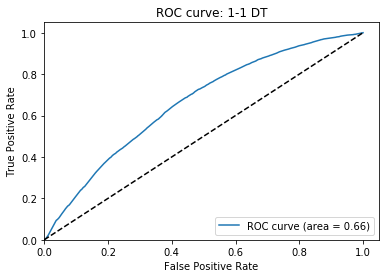

In [309]:
m.plot_roc()

<Figure size 432x288 with 0 Axes>

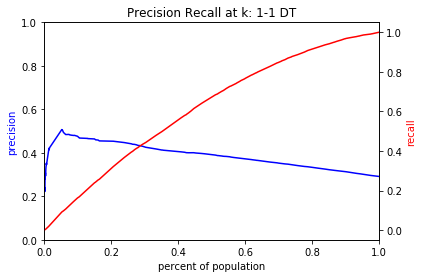

In [310]:
fig = m.plot_precision_recall_curve(output_type='save')

In [ ]:
pl